## EDA (Exploratory Data Analysis)
Satrio Dirgantoro (JCDS 10 JKT)

Referensi:

[Sumber](https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/) Univariate, Bivariate, Multivariate  
[Sumber](https://python-graph-gallery.com) seaborn,matplotlib, wordcloud  
[Sumber](https://python-visualization.github.io/folium/) folium  
[Sumber](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) pandas  
[Sumber](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) pandas pivot table

## Context

Dalam menentukan harga property, seperti yang dilansir [Sumber](https://realestatesevenhillsnews.com.au/the-worst-property-selling-you-can-ever-mistake/) baik sebagai penjual ataupun pembeli memang bukanlah perkara mudah. Jika anda mencari lewat situs google bagaimana cara menentukan harga properti anda maka akan sangat banyak hasil pencarian yang keluar dengan cara yang berbeda-beda. 

Sebagai penjual/pembeli untuk menentukan harga yang tepat diperlukan research lebih dalam untuk mengetahui fitur-fitur apa saja yang mempengaruhi harga suatu properti. Ditambah dengan adanya House Bubble yang membuat lebih sulit untuk menentukan harga properti

## Problems

Pada tahun 2016-2018, Melbourne mengalami housing bubble atau kenaikan harga rumah yang dipicu oleh permintaan, spekulasi, dan pengeluaran yang berlebihan hingga ke titik kehancuran, seperti dilansir oleh [Source](https://www.finder.com.au/property-bubble). Dalam kondisi seperti ini, tentu akan lebih sulit untuk para vendor atau property owner untuk menentukan harga yang tepat yang sesuai dengan market agar tidak menjual harga properti terlalu mahal sehingga sulit untuk dijual dan juga tidak terlalu murah agar tidak kehilangan profit.

## Goals

Dalam Project ini, saya akan menganalisis harga properti, lebih spesifiknya rumah di Melbourne dan melihat fitur fitur apa saja yang mempengaruhi harga dari suatu rumah dan membuat model machine learning dengan pendekatan Supervised Learning: Regression untuk memprediksi harga rumah berdasarkan fitur fiturnya.

## License
The dataset was taken from Kaggle under [License](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# # Notes
# """Pembangunan properti di daerah-daerah strategis kerap gencar dilakukan, hal ini dipicu dengan banyaknya permintaan dari pasar. 
# Maka beberapa developer pun berebut mendirikan hunian di sekitar daerah tersebut. 
# Namun sesuai dengan hukum ekonomi bahwa harga barang cenderung naik karena banyaknya permintaan pasar terhadadap barang tersebut, maka hukum ini pun berlaku juga terhada properti.
# Maka tidak jarang keberadaan hunian di daerah strategis relatif mahal ketimbang yang terletak di daerah lain. 
# Namun kenaikan harga properti ini bisa saja memicu pengurangan pembelian oleh consumer atau sepi peminta, 
# akibatnya harga properti tersebut mengalami penurunan. Hal tersebutlah yang disebut peristiwa Property Bubble.
# Seperti yang dilansir [Artikel](https://www.abc.net.au/news/2019-09-28/disenfranchised-millennials-property-ownership-unaffordable/11555420) The latest Perceptions of Housing Affordability report by property analysts CoreLogic melaporkan sekitar 63 persen warga Australia yang belum berumur 30 tahun merasa tidak mampu membeli rumah. Dan dilaporkan juga dalam artikel tersebut bahwa kebanyakan dari mereka untuk solusinya adalah menyewa terlebih dahulu sebelum membeli rumah."""

Import Packages

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, FastMarkerCluster
import math
import scipy
from scipy import stats
from collections import Counter
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.options.display.max_columns = 999 # untuk display semua kolom

Import and Read Data

In [3]:
df = pd.read_csv('MelbourneCleanInterpolate.csv', parse_dates=['Date']) # Convert Kolom Date dtypes menjadi datetime
df.head() # Tampilan 5 data teratas

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,140.0,1950.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,95.0,1950.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [164]:
# Informasi singkat tentang dataset

df.info()

# Terdapat 27,242 baris dan 20 kolom
# 7 kolom dengan tipe data object 12 tipe data numerik dan 1 data datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27074 entries, 0 to 27073
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27074 non-null  object        
 1   Address        27074 non-null  object        
 2   Rooms          27074 non-null  int64         
 3   Type           27074 non-null  object        
 4   Price          27074 non-null  float64       
 5   Method         27074 non-null  object        
 6   SellerG        27074 non-null  object        
 7   Date           27074 non-null  datetime64[ns]
 8   Distance       27074 non-null  float64       
 9   Postcode       27074 non-null  float64       
 10  Bathroom       27074 non-null  float64       
 11  Car            27074 non-null  float64       
 12  Landsize       27074 non-null  float64       
 13  BuildingArea   27074 non-null  float64       
 14  YearBuilt      27074 non-null  float64       
 15  CouncilArea    2707

In [165]:
# Data Summary
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].unique()
    ])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

# Berdasarkan data dibawah, tampak data sudah bersih, tidak Null/Nan Values terdeteksi

,Features,D types,Null,Null%,Unique,Unique Value
0,Suburb,object,0,0.0,338,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,0.0,26580,"[85 Turner St, 25 Bloomburg St, 5 Charles St, ..."
2,Rooms,int64,0,0.0,12,"[2, 3, 4, 1, 5, 6, 8, 7, 10, 9, 12, 16]"
3,Type,object,0,0.0,3,"[h, t, u]"
4,Price,float64,0,0.0,2868,"[1480000.0, 1035000.0, 1465000.0, 850000.0, 16..."
5,Method,object,0,0.0,5,"[S, SP, PI, VB, SA]"
6,SellerG,object,0,0.0,349,"[Biggin, Nelson, Jellis, Dingle, Purplebricks,..."
7,Date,datetime64[ns],0,0.0,78,"[2016-03-12T00:00:00.000000000, 2016-04-02T00:..."
8,Distance,float64,0,0.0,212,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,0,0.0,208,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


In [166]:
# Descriptive Statistic dari Dataset

df.describe().T

# Jika kita lihat kolom target (price), nilai mediannya adalah 870 ribuan, sedangkan nilai maksimummnya ada di kisaran 11 juta.
# Mengindikasikan adanya outliers pada kolom target. Lengkapnya akan saya telusuri distribusi kolom target menggunakan seaborn plot

,count,mean,std,min,25%,50%,75%,max
Rooms,27074.0,2.992059e+00,0.955581,1.00000,2.0000,3.000000,4.000000e+00,1.600000e+01
Price,27074.0,1.051512e+06,642080.313005,85000.00000,635125.0000,874500.000000,1.300000e+06,1.120000e+07
Distance,27074.0,1.125145e+01,6.771446,0.00000,6.4000,10.400000,1.400000e+01,4.810000e+01
Postcode,27074.0,3.113717e+03,110.687279,3000.00000,3046.0000,3088.000000,3.153000e+03,3.978000e+03
Bathroom,27074.0,1.543067e+00,0.675442,1.00000,1.0000,1.000000,2.000000e+00,9.000000e+00
Car,27074.0,1.662591e+00,0.903250,0.00000,1.0000,2.000000,2.000000e+00,1.800000e+01
Landsize,27074.0,5.306764e+02,3075.233141,1.00000,189.0000,465.000000,6.300000e+02,4.330140e+05
BuildingArea,27074.0,1.431750e+02,283.872566,0.00000,95.0000,135.000000,1.615000e+02,4.451500e+04
YearBuilt,27074.0,1.967284e+03,25.638785,1820.00000,1960.0000,1970.000000,1.980000e+03,2.019000e+03
Lattitude,27074.0,-3.780775e+01,0.090862,-38.19043,-37.8618,-37.801698,-3.774903e+01,-3.739780e+01


In [167]:
# Melihat statistik dari kolom data types Object
df.describe(include='O').T


# Dapat dilihat, Tipe Properti mayoritas merupakan tipe h atau house dibanding 2 tipe properti lainnya
# Terdapat 338 daerah/suburb di dataset ini, sebanyak 349 property agency, 33 Council Area dan 8 Regionname

,count,unique,top,freq
Suburb,27074,338,Reservoir,726
Address,27074,26580,5 Charles St,4
Type,27074,3,h,18349
Method,27074,5,S,17394
SellerG,27074,349,Nelson,2725
CouncilArea,27074,33,Boroondara City Council,2519
Regionname,27074,8,Southern Metropolitan,8511


## Feature Selection

### Numerical Feature

Melihat Korelasi kolom numerikal dengan kolom target (Price)

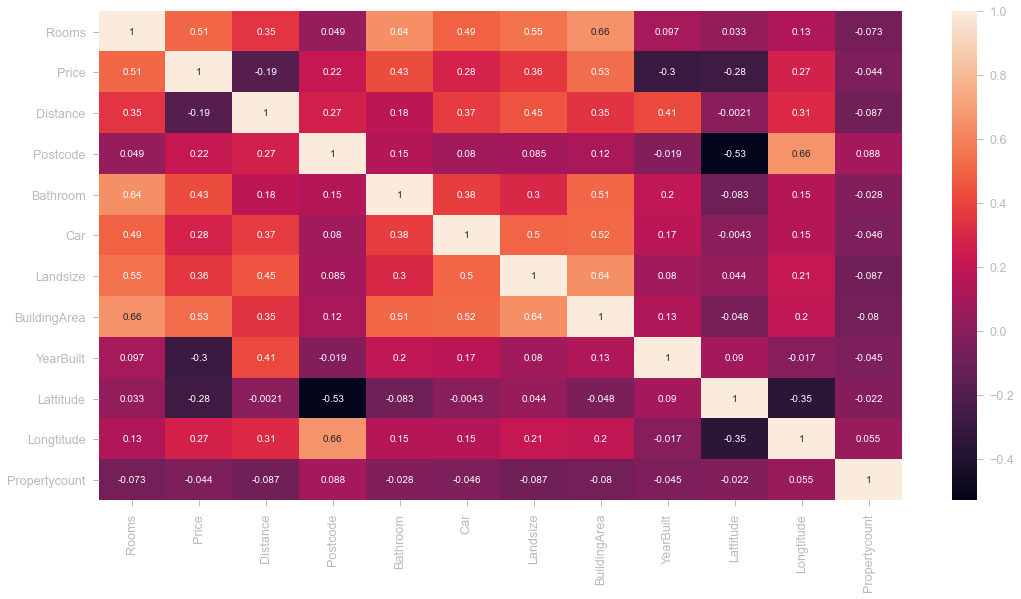

In [168]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr('spearman'), annot=True);

- Menggunakan hasil korelasi spearman karena distribusi data tidak normal, dapat dilihat bahwa Rooms, Bathroom, Car, Landsize dan Building Area memiliki korelasi positif sedangkan Distance dan Yearbuilt memiliki korelasi negatif.
- Hal ini menunjukkan semakin banyak sebuah kamar, kamar mandi dan space mobil/parkiran pada suatu rumah berbanding lurus dengan harga yang semakin besar/tinggi juga.
- Sedangkan dari distance ke cbd atau pusat kota, semakin tinggi value atau semakin jauh jarak rumah dari pusat kota semakin berkurangnya value harga rumah tersebut
- Yang perlu menjadi perhatian adalah YearBuilt yang korelasinya terhadap kolom price negatif, dimana sebuah rumah yang Year Built nya semakin muda semakin berkurangnya nilai dari sebuah Rumah. Hal ini akan ditelusuri lebih lanjut dibawah.

## Categorical Feature

In [169]:
# Menghitung Correlation Ratio kolom target (numerik) dengan kolom kategorikal

def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta


In [170]:
# Mengambil colom dengan tipe object

cat_col = df.select_dtypes(include=['object']).columns

In [171]:
cat_col

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [172]:
for i in cat_col:
    print(f"{i}\t: {correlation_ratio(df[i], df['Price'])}")

# Melihat asosiasi kolom kategorikal dengan kolom target price (numerikal)

Suburb	: 0.5759217135053036
Address	: 0.9958163669497644
Type	: 0.3707325090474201
Method	: 0.1251149040954949
SellerG	: 0.49058047581414943
CouncilArea	: 0.488173577466723
Regionname	: 0.3880299230200563


- Karena address unique maka akan kita abaikan
- Kolom Suburb, SellerG, Council Area menunjukkan asosiasi yang cukup tinggi.

## Feature Engineering
Untuk menampilkan visualisasi dan analisis yang lebih tepat maka akan dilakukan feature engineering untuk beberapa kolom dengan menggunakan teknik Adding Feature dan Grouping/Binning pada kolom tertentu

In [4]:
# Adding Feature Month and Year

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [5]:
# Adding Feature House Age

df['age'] = df['Year'] - df['YearBuilt']

In [6]:
# Adding Feature price/sqm

df['Price/sqm'] = df['Price']/df['Landsize']

In [7]:
# Binning the price column

bin_price = [0, 500000, 1000000, 2000000, 3000000, 5000000,df['Price'].max()]
label_price = ['up to 500k','up to 1M', 'up to 2M', 'up to 3M', 'up to 5M', 'Above 5M']
df['price_group'] = pd.cut(df['Price'], bins = bin_price, labels = label_price)

In [8]:
# Binning Age house

bin_Age = [-3, 0, 10, 20, 40, 60,80,120,140,df['age'].max()]
label_age = ['below 1 year','below 10 years', 'below 20 years', 'below 40 years', 'below 60 years','below 80 years', 'below 120 years', 'below 140 years', 'above 140 years']
df['age_group'] = pd.cut(df['age'], bins = bin_Age, labels = label_age)

## Univariate Analysis
### Numerical Features

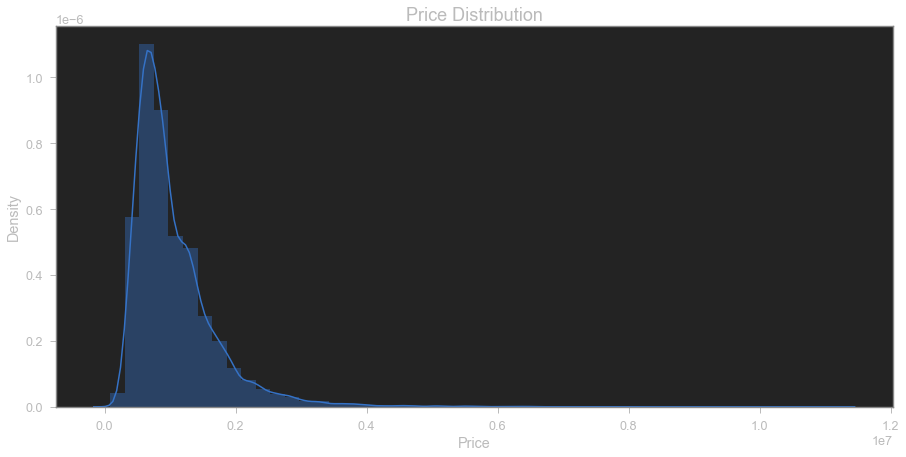

In [178]:
# Melihat Distribusi kolom Target

plt.figure(figsize=(15,7))
sns.distplot(df['Price']);
plt.title('Price Distribution', fontdict={'fontsize': 18,'fontweight' : 9})
plt.show()

Berdasarkan plot diatas, distribusi kolom price terlihat menunjukkan Skewness yang bernilai positif dimana ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah dan nilai rata-rata nya diatas nilai median. Hal ini juga menunjukkan bahwa kebanyakan dari rumah yang dijual harganya dibawah rata-rata/median dan ada beberapa rumah yang terjual dengan harga yang sangat tinggi jauh melebihi harga pasaran.

### Latitude Longitude

In [179]:
df_500k = df.loc[df['price_group']=='up to 500k']
df_500k.reset_index(drop=True, inplace=True)

df_1M = df.loc[df['price_group']=='up to 1M']
df_1M.reset_index(drop=True, inplace=True)

df_2M = df.loc[df['price_group']=='up to 2M']
df_2M.reset_index(drop=True, inplace=True)

df_3M = df.loc[df['price_group']=='up to 3M']
df_3M.reset_index(drop=True, inplace=True)

df_5M = df.loc[df['price_group']=='up to 5M']
df_5M.reset_index(drop=True, inplace=True)

df_above_5M = df.loc[df['price_group']=='Above 5M']
df_above_5M.reset_index(drop=True, inplace=True)

In [184]:
# Follium map dengan masing2 price group diambil 200 sample

Melbourne = folium.Map(
    location=[-37.7996, 144.9984],
    zoom_start=11.5,
    tiles='cartodbdark_matter'
)

    
for i in range(len(df_500k.sample(200))):
    folium.Marker(location= [df_500k['Lattitude'][i],df_500k['Longtitude'][i]],
    tooltip = "up to 500k",
    popup= f"Price: {df_500k['Price'][i]} \nCouncilArea: {df_500k['CouncilArea'][i]}\nSuburb: {df_500k['Suburb'][i]} \nDistance: {df_500k['Distance'][i]}",
    icon = folium.Icon(color='lightgreen',icon_size=(35,35))).add_to(Melbourne)

for i in range(len(df_1M.sample(200))):
    folium.Marker(location= [df_1M['Lattitude'][i],df_1M['Longtitude'][i]],
    tooltip = "up to 1M",
    popup= f"Price: {df_1M['Price'][i]} \nCouncilArea: {df_1M['CouncilArea'][i]}\nSuburb: {df_1M['Suburb'][i]}\nDistance: {df_1M['Distance'][i]}",
    icon = folium.Icon(color='green',icon_size=(35,35))).add_to(Melbourne)
    
for i in range(len(df_2M.sample(200))):
    folium.Marker(location= [df_2M['Lattitude'][i],df_2M['Longtitude'][i]],
    tooltip = "up to 2M",
    popup= f"Price: {df_2M['Price'][i]} \nCouncilArea: {df_2M['CouncilArea'][i]}\nSuburb: {df_2M['Suburb'][i]}\nDistance:  {df_2M['Distance'][i]}",
    icon = folium.Icon(color='orange',icon_size=(35,35))).add_to(Melbourne)
    
for i in range(len(df_3M.sample(200))):
    folium.Marker(location= [df_3M['Lattitude'][i],df_3M['Longtitude'][i]],
    tooltip = "up to 3M",
    popup= f"Price: {df_3M['Price'][i]} \nCouncilArea: {df_3M['CouncilArea'][i]}\nSuburb: {df_3M['Suburb'][i]}\nDistance:  {df_3M['Distance'][i]}",
    icon = folium.Icon(color='darkblue',icon_size=(35,35))).add_to(Melbourne)

for i in range(len(df_5M.sample(200))):
    folium.Marker(location= [df_5M['Lattitude'][i],df_5M['Longtitude'][i]],
    tooltip = "up to 5M",
    popup= f"Price: {df_5M['Price'][i]} \nCouncilArea: {df_5M['CouncilArea'][i]}\nSuburb: {df_5M['Suburb'][i]}\nDistance:  {df_5M['Distance'][i]}",
    icon = folium.Icon(color='darkred',icon_size=(35,35))).add_to(Melbourne)

for i in range(len(df_above_5M)):
    folium.Marker(location= [df_above_5M['Lattitude'][i],df_above_5M['Longtitude'][i]],
    tooltip = "Above 5M",
    popup= f"Price: {df_above_5M['Price'][i]} \nCouncilArea: {df_above_5M['CouncilArea'][i]}\nSuburb: {df_above_5M['Suburb'][i]}\nDistance:  {df_above_5M['Distance'][i]}",
    icon = folium.Icon(color='black',icon_size=(35,35))).add_to(Melbourne)
    
# for i in range(len(df_3_6M_above.sample(100))):
#     folium.Marker(location= [df_3_6M_above['Lattitude'][i],df_3_6M_above['Longtitude'][i]],
#     tooltip = "above 3.6M",
#     popup= f"Price: above 3.6M \nZipcode: {df_3_6M_above['Postcode'][i]}\nDistance:  {df_3_6M_above['Distance'][i]}",
#     icon = folium.Icon(color='pink',icon_size=(35,35))).add_to(Melbourne)

HeatMap(
    data=df.loc[:, ['Lattitude', 'Longtitude','Postcode']],
    radius=10
).add_to(Melbourne)


Melbourne

Dari Peta diatas, yang berwarna hijau terang hijau tua adalah rumah dengan kisaran harga 500k - 1M kebanyakan berada jauh dari CBD, marker yang berwarna hitam dan biru gelap adalah rumah dengan kisaran harga 4 - 10M berada disekitar/dekat dengan CBD area. Dapat terlihat juga dari peta diatas bahwa rumah dengan harga diatas 2M cenderung akan berada disekitar rumah yang harganya diatas kisaran tersebut. Ini mengindikasikan bahwa memang di beberapa daerah/suburb/pinggir kota yang merupakan daerah elit dan ada beberapa daerah yang memang kisaran harganya dibawah 1M.  
***Hipotesa Awal: Rumah yang terjual dengan harga sangat tinggi kemungkinan besar karena jarak ke pusat kota nya cenderung dekat.***

Postcode

In [22]:
(df['Postcode'].value_counts(normalize=True)*100)
# Rumah yang dijual paling banyak di postcode 3073

3073.0    2.681539
3046.0    2.005614
3020.0    1.998227
3165.0    1.820935
3121.0    1.806161
            ...   
3786.0    0.003694
3770.0    0.003694
3793.0    0.003694
3975.0    0.003694
3096.0    0.003694
Name: Postcode, Length: 208, dtype: float64

Distance

In [23]:
(df['Distance'].value_counts(normalize=True)*100)
# Kebanyakan rumah di jual di jarak 11.2 KM dari CBD dengan besar persentase 4%

11.2    4.103568
13.8    2.061018
10.5    1.939130
5.2     1.795080
7.8     1.702741
          ...   
33.8    0.003694
23.6    0.003694
22.9    0.003694
33.0    0.003694
20.1    0.003694
Name: Distance, Length: 212, dtype: float64

Rooms

In [193]:
(df[['Rooms']].value_counts(normalize=True)*100)

# Sebanyak 43% atau hampir dari setengah populasi rumah yang dijual memiliki jumlah 3 kamar
# diikuti dengan 2 dan 4 kamar yang jumlah persentasenya 25% dan 22%

Rooms
3        43.828027
2        24.935362
4        21.725641
5         4.447071
1         4.402748
6         0.502327
7         0.073872
8         0.051710
10        0.018468
12        0.007387
16        0.003694
9         0.003694
dtype: float64

Bathroom

In [194]:
(df[['Bathroom']].value_counts(normalize=True)*100)

# Setengah dari populasi rumah, tepatnya 54% memiliki 1 kamar mandi full
# Dan 39% nya dari populasi rumah memiliki 2 kamar mandi full

Bathroom
1.0         54.103568
2.0         38.775209
3.0          6.175667
4.0          0.657457
5.0          0.173598
6.0          0.036936
2.5          0.036936
9.0          0.014774
8.0          0.011081
7.0          0.007387
7.5          0.003694
3.5          0.003694
dtype: float64

Car

In [26]:
(df['Car'].value_counts(normalize=True)*100)

# Untuk Kolom Car, terlihat setengah atau lebih tepatnya 47% dari populasi Rumah memiliki space/garasi muat untuk 2 mobil
# 40% dari keseluruhan data memiliki 1 spot/garasi mobil

2.0     46.856763
1.0     39.617345
0.0      4.620669
3.0      4.565266
4.0      3.350078
5.0      0.417375
6.0      0.387826
7.0      0.070178
8.0      0.066484
10.0     0.018468
2.5      0.014774
9.0      0.007387
11.0     0.003694
18.0     0.003694
Name: Car, dtype: float64

Landsize

In [27]:
(df['Landsize'].value_counts(normalize=True)*100).head(10)

# Mayoritas rumah lahannya seluas 85 sqm dengan jumlah persentase 5%

84.5     5.230110
604.0    2.448844
97.5     2.382359
134.0    1.277979
156.0    1.156091
188.0    0.964025
493.0    0.952944
120.0    0.908621
594.0    0.856911
608.0    0.812588
Name: Landsize, dtype: float64

BuildingArea

In [28]:
(df['BuildingArea'].value_counts(normalize=True)*100).head(10)

# Untuk ukuran bangunan mayoritas rumah memiliki luas bangunan 135sqm

135.0    3.169092
86.0     2.899461
153.0    2.703701
160.0    2.644604
140.0    2.393440
143.0    2.378666
219.5    2.205068
120.0    2.068405
84.0     1.957598
95.0     1.916968
Name: BuildingArea, dtype: float64

YeaBuilt

In [29]:
(df['YearBuilt'].value_counts(normalize=True)*100).head(10)

# Mayoritas rumah dibangun sekitar tahun 60 dan 70 dengan jumlah persentase 38% dari total keseluruhan

1960.0    19.786511
1970.0    17.799365
1975.0     6.061166
1980.0     5.750905
1950.0     4.893994
1969.0     3.534757
1966.5     3.257738
1995.0     2.940090
1940.0     2.921622
1990.0     2.892074
Name: YearBuilt, dtype: float64

Age

In [195]:
(df[['age']].value_counts(normalize=True)*100).sort_index()

# Terdapat Umur dari sebuah angkanya minus, ini mengindikasikan bahwa ada rumah yang belum di bangun tetapi sudah terjual.
# Ini lumrah terjadi di dunia property dimana memang developer sudah mulai menjual saat property belum atau sedang dibangun lebih dikenal dengan istilah menjual unit inden Source:https://asriman.com/kapan-sebaiknya-dimulai-pemasaran-proyek-properti/

age   
-2.0      0.003694
-1.0      0.022161
 0.0      0.247470
 1.0      0.424762
 2.0      0.487553
            ...   
 162.0    0.003694
 166.0    0.007387
 167.0    0.007387
 186.0    0.003694
 197.0    0.003694
Length: 164, dtype: float64

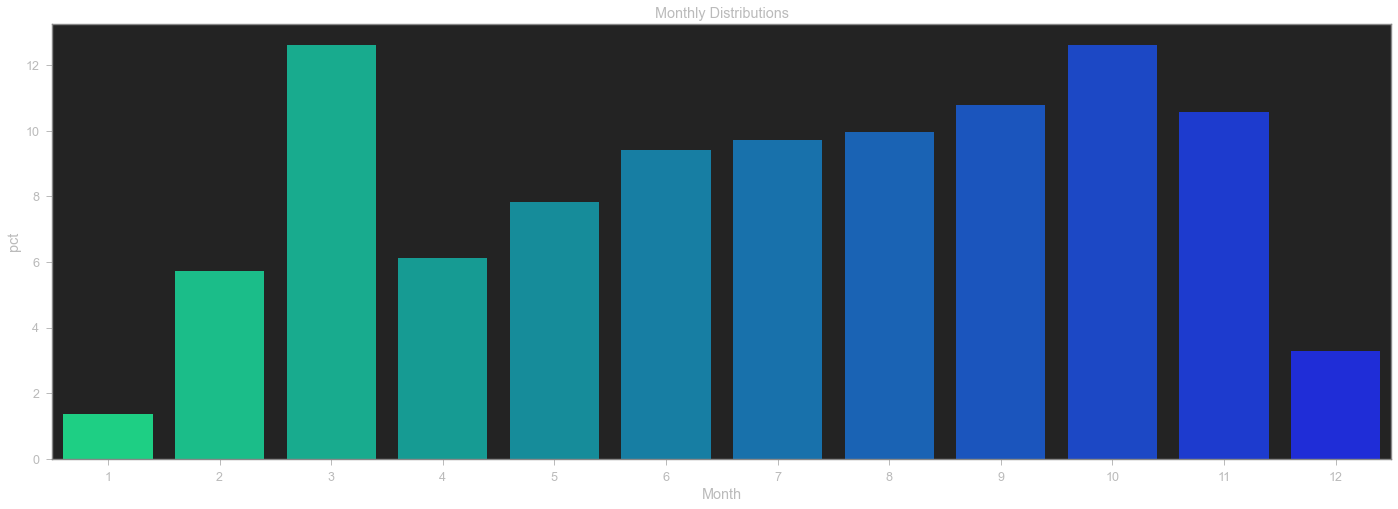

In [192]:
# (df['Month'].value_counts(normalize=True)*100).sort_index()
Months = (pd.crosstab(index=df['Month'], columns='pct', normalize=True)*100).sort_values('pct',ascending=False)
Months = Months.reset_index()

plt.figure(figsize=(24,8))
sns.barplot(x='Month',y= 'pct', data=Months, palette = 'winter_r')
plt.title('Monthly Distributions')
plt.show()



- Data per bulan, nampak bahwa penjualan rumah di melbourne paling banyak terjadi di bulan 3 atau Mei dan di bulan 10/Oktober
- Penjualan terendah terjadi di bulan Desember dan Januari, menurut beberapa artikel menyebutkan aktifitas market memang lesu menjelang christmas dan setelah libur tahun baru [artikel](https://www.struttandparker.com/knowledge-and-research/why-january-time-put-your-house-market)

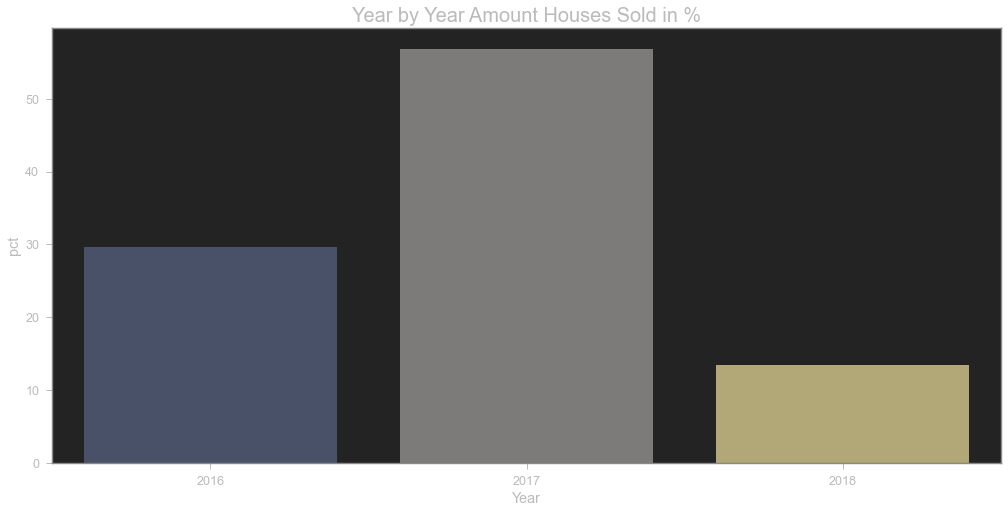

Increment 2017 vs 2016:  92.12824351297407
Increment 2018 vs 2017:  -76.26777481981689


In [187]:
# (df['Year'].value_counts(normalize=True)*100).sort_index()
Years = (pd.crosstab(index=df['Year'], columns='pct', normalize=True)*100).sort_values('pct',ascending=False)
Years = Years.reset_index()

plt.figure(figsize=(17,8))
sns.barplot(x='Year',y= 'pct', data=Years, palette = 'cividis')
plt.title('Year by Year Amount Houses Sold in %', fontdict={'fontsize':20})
plt.show()

print('Increment 2017 vs 2016: ',((15401/8016)-1)*100)
print('Increment 2018 vs 2017: ',((3655/15401)-1)*100)

In [33]:
df.loc[(df['Year']==2018),'Month'].unique()

# Data 2018 terlihat hanya sampai bulan 10.

array([ 6,  3, 10,  1,  2], dtype=int64)

- Untuk data penjualan rumah per tahun, penjualan paling banyak terjadi di Tahun 2017
- Mengutip dari [Artikel] (https://www.investopedia.com/terms/h/housing_bubble.asp) Housing bubble adalah kenaikan harga rumah yang dipicu oleh permintaan, spekulasi, dan pengeluaran yang berlebihan hingga ke titik kehancuran. Gelembung perumahan biasanya dimulai dengan peningkatan permintaan, di hadapan pasokan terbatas, yang membutuhkan waktu yang relatif lama untuk mengisi dan meningkatkan. Dan dapat dilihat bahwa peningkatan penjualan rumah mencapai 92% increment di tahun 2017 vs 2016, ada indikasi kenaikan permintaan/demand yang signifikan terhadap pembelian rumah dan pada tahun 2018 rumah yang terjual menurun sampai -76% dibanding tahun 2017. (dengan catatan data pada tahun 2018 hanya diambil hingga bulan 10)

### Categorical Features

Type

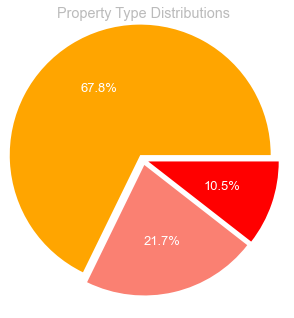

In [191]:
pie = round(df['Type'].value_counts(normalize=True) * 100,2)
x = pie.index
y = pie.values
plt.figure(figsize=(12,5))  
plt.pie(y, colors=['orange','salmon','red'], labels=['h','u','t'],
       startangle=0,
        textprops={'size': 13, 'color' : 'white'},
        autopct="%1.1f%%",
        radius = 1.2,explode=(.05,.05,.05));
plt.title('Property Type Distributions')
plt.show()

# Mayoritas tipe rumah yang dijual adalah h (house)

Method

In [196]:
(df[['Method']].value_counts(normalize=True)*100)

# Sekitar 12% property berstatus PI atau Passed In, dimana ini adalah kondisi penawaran belum mencapai harga minimum yang mereka tentukan untuk dijual.
# Untuk penelusuran lebih dalam akan dilakukan pada tahan bivariate analysis

Method
S         64.246140
SP        13.211938
PI        11.970895
VB         9.876634
SA         0.694393
dtype: float64

SellerG

In [36]:
(df['SellerG'].value_counts(normalize=True)*100).head(10)

# Property Agent Nelson mendominasi penjulan sebesar 10% dari total keseluruhan

Nelson           10.065007
Jellis            9.311517
Barry             8.794415
hockingstuart     7.760213
Ray               5.732437
Buxton            5.274433
Marshall          4.491394
Biggin            2.397134
Fletchers         2.253084
Brad              2.249391
Name: SellerG, dtype: float64

Council Area

In [37]:
(df['CouncilArea'].value_counts(normalize=True)*100)

# Mayoritas rumah yang dijual berada di Council Area Boroondara City Council dan Darebin City Council

Boroondara City Council           9.304129
Darebin City Council              8.665140
Moreland City Council             6.604122
Glen Eira City Council            6.061166
Moonee Valley City Council        5.843244
Melbourne City Council            5.529290
Banyule City Council              5.122996
Brimbank City Council             4.997414
Bayside City Council              4.834897
Maribyrnong City Council          4.502475
Hume City Council                 3.785920
Monash City Council               3.712048
Port Phillip City Council         3.516289
Yarra City Council                3.387013
Stonnington City Council          3.246657
Manningham City Council           3.095221
Hobsons Bay City Council          2.947477
Kingston City Council             2.674152
Whittlesea City Council           2.618749
Wyndham City Council              1.795080
Whitehorse City Council           1.599320
Maroondah City Council            1.303834
Knox City Council                 1.056364
Melton City

Regionname

In [38]:
(df['Regionname'].value_counts(normalize=True)*100)

# 98% rumah yang dijual berada di Region Metropolitan
# Dengan Souther Metro menjadi tempat terbanyak dengan 31%

Southern Metropolitan         31.436064
Northern Metropolitan         28.732363
Western Metropolitan          21.389525
Eastern Metropolitan          12.022605
South-Eastern Metropolitan     4.875526
Northern Victoria              0.605747
Eastern Victoria               0.594666
Western Victoria               0.343503
Name: Regionname, dtype: float64

Age Group

In [39]:
(df['age_group'].value_counts(normalize=True)*100)

# Setengah dari populasi rumah (52%) umurnya dibawah 60 tahun diatas 40 tahun.

below 60 years     52.659378
below 40 years     14.264608
below 80 years     10.759400
below 120 years     7.387161
below 10 years      7.062126
below 20 years      5.706582
below 140 years     1.769225
below 1 year        0.273325
above 140 years     0.118195
Name: age_group, dtype: float64

## Multivariate Analysis
### Numerical Features

Rooms vs Price

In [40]:
pd.crosstab(index=[df['Rooms']], columns='Price',values=df['Price'], aggfunc='median').sort_values('Price',ascending=False)

# Dari data dibawah, terlihat korelasi positif antara jumlah kamar dan harga, semakin banyak jumlah kamar sebuah rumah maka semakin tinggi harga rumah tersebut.

col_0,Price
Rooms,
16,5000000.0
12,2705000.0
10,2115000.0
6,1663000.0
5,1553000.0
8,1535883.0
9,1380000.0
7,1350000.0
4,1210000.0


In [41]:
print('Increment Harga Rumah dengan Jumlah 1 - 3 kamar tidur 2017 vs 2016: ',((df.loc[(df['Year']==2017) & (df['Rooms']<=3),'Price'].median()/df.loc[(df['Year']==2016) & (df['Rooms']<=3),'Price'].median())-1)*100)
print('Increment Harga Rumah dengan Jumlah 4 - 6 kamar tidur 2017 vs 2016: ',((df.loc[(df['Year']==2017) & (df['Rooms']>3)& (df['Rooms']>=6),'Price'].median()/df.loc[(df['Year']==2016)& (df['Rooms']>3)& (df['Rooms']>=6),'Price'].median())-1)*100)
print('Increment Harga Rumah dengan Jumlah lebih dari 6 kamar tidur 2017 vs 2016: ',((df.loc[(df['Year']==2017) & (df['Rooms']>6),'Price'].median()/df.loc[(df['Year']==2016) & (df['Rooms']>=6),'Price'].median())-1)*100)

Increment Harga Rumah dengan Jumlah 1 - 3 kamar tidur 2017 vs 2016:  2.432778489116516
Increment Harga Rumah dengan Jumlah 4 - 6 kamar tidur 2017 vs 2016:  -7.777777777777772
Increment Harga Rumah dengan Jumlah lebih dari 6 kamar tidur 2017 vs 2016:  -7.401888888888886


Jika kita lihat lebih dalam lagi ternyata, harga rumah dengan jumlah kamar sampai dengan 3 naik dari tahun 2016 ke 2017, tercatat 2.4% kenaikan nilai median, sedangkan Rumah yang memiliki kamar lebih dari 3 kamar cenderung turun nilai mediannya sampai dengan -7%

Bathroom vs Price

In [42]:

pd.crosstab(index=[df['Bathroom']], columns='Price', values=df['Price'], aggfunc='median').sort_values('Price',ascending=False)

# Untuk Kolom Bathroom terlihat juga bahwa ada korelasi positif dengan kolom target, dimana semakin banyak jumlah Bathroom nya semakin tinggi harga rumahnya

col_0,Price
Bathroom,
7.0,3425000.0
7.5,3130000.0
5.0,2580000.0
4.0,2455000.0
9.0,2215000.0
8.0,2200000.0
6.0,1810000.0
3.0,1550000.0
3.5,1290000.0


Car vs Price

In [43]:

pd.crosstab(index=[df['Car']], columns='Price', values=df['Price'], aggfunc='median').sort_values('Price',ascending=False)

# Untuk Kolom Car tidak begitu terlihat korelasi antar kedua kolom ini, dapat diasumsikan bahwa jumlah spot untuk mobil tidak terlalu bepengaruh ke harga suatu rumah

col_0,Price
Car,
2.5,2525000.0
9.0,2050000.0
7.0,1237500.0
3.0,1120500.0
8.0,1115000.0
18.0,1105000.0
6.0,1100000.0
4.0,1010000.0
0.0,1000000.0


Distance vs Price

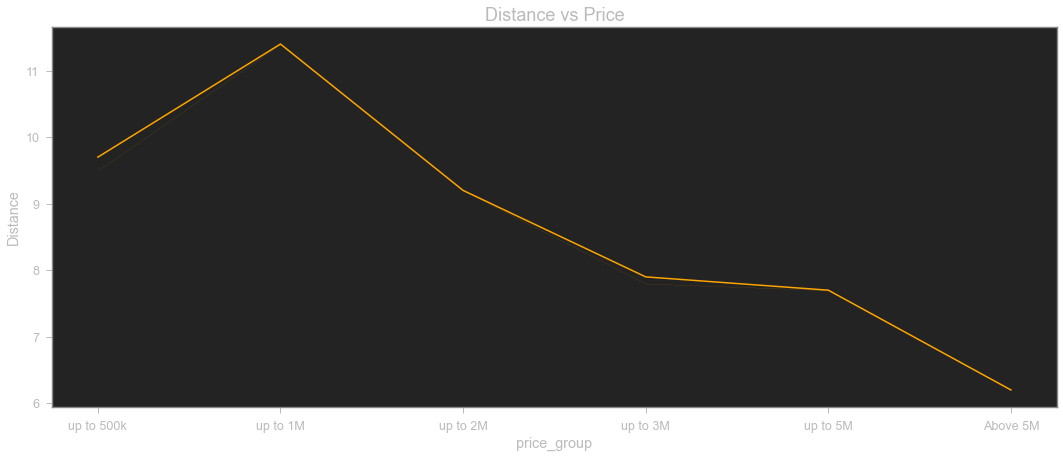

In [203]:

plt.figure(figsize=(18,7))
sns.lineplot(y=df['Distance'],x=df['price_group'], color='orange', ci=False, estimator=median);
plt.title('Distance vs Price',fontdict= {'fontsize':18})
plt.show()

# Berdasarkan plot dibawah, Dapat kita lihat semakin jarak sebuah rumah mendekati CBD maka semakin tinggi harga suatu rumah tersebut.

In [103]:
print(f"Median price of property not unit with 2 bedroom and distance to CBD < 10 km: AUD {df.loc[(df['Rooms']==2) & (df['Distance']<10),'Price'].median():,}")
# print(f"Harga rata2: AUD {df.loc[(df['Rooms']==2) & (df['Distance']<10) & (df['Type']!='u') & (df['Method']!='PI') & (df['Price']<707000),'Price'].median():,}")
affordable_house = df.loc[(df['Rooms']==2) & (df['Distance']<10) & (df['Type']!='u') & (df['Method']!='PI') & (df['Price']<707000)].sort_values('Price')
affordable_house.head(10)

# Dengan melihat table dibawah, terlihat 10 daftar teratas property type house dan townhouse paling affordable di Melbourne dengan jarak kurang dari 10 km dari CBD.
# Daftar rumah dibawah ini terlihat luas bangunannya rata rata2 dibawah 120 sqm dan jarak ke CBD diatas 8 km.
# Dari daftar ini juga bisa kita lihat bahwa kebanyakan kebanyaan berasal dari region Western dan Nnorthern Metropolitan

Median price of property not unit with 2 bedroom and distance to CBD < 10 km: AUD 707,000.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
9165,West Footscray,51 Roberts St,2,h,326500.0,S,Sweeney,2017-02-25,8.2,3012.0,1.0,2.0,626.0,124.0,1960.0,Maribyrnong City Council,-37.8067,144.8707,Western Metropolitan,5058.0,2,2017
5019,Maribyrnong,7/13 Navigator St,2,h,335000.0,S,hockingstuart,2016-09-17,8.7,3032.0,1.0,1.0,325.0,99.0,1960.0,Maribyrnong City Council,-37.7681,144.8979,Western Metropolitan,4918.0,9,2016
4974,Maribyrnong,8/42 Wests Rd,2,t,355000.0,SP,Biggin,2016-04-06,8.7,3032.0,1.0,1.0,158.5,88.0,2004.0,Maribyrnong City Council,-37.7716,144.8820,Western Metropolitan,4918.0,4,2016
9130,West Footscray,2/10 Hatfield Ct,2,h,360000.0,S,Sweeney,2016-08-10,8.2,3012.0,1.0,1.0,92.0,91.0,1970.0,Maribyrnong City Council,-37.8095,144.8690,Western Metropolitan,5058.0,8,2016
4188,Heidelberg West,2/287 Liberty Pde,2,t,370000.0,VB,Miles,2016-07-05,9.4,3081.0,1.0,1.0,100.0,90.0,2013.0,Banyule City Council,-37.7383,145.0360,Eastern Metropolitan,2674.0,7,2016
3385,Footscray,3/8 Eleanor St,2,h,375000.0,S,Sweeney,2016-07-05,6.4,3011.0,1.0,1.0,325.0,120.0,1968.0,Maribyrnong City Council,-37.7906,144.8856,Western Metropolitan,7570.0,7,2016
1832,Brunswick West,11/7 Egginton St,2,t,380000.0,VB,Nelson,2016-07-11,5.9,3055.0,1.0,1.0,160.0,85.0,1970.0,Moreland City Council,-37.7607,144.9393,Northern Metropolitan,7082.0,7,2016
5875,Pascoe Vale,9/12 Pascoe St,2,h,386000.0,S,D'Aprano,2016-07-05,9.9,3044.0,1.0,1.0,111.0,67.0,1987.0,Moreland City Council,-37.7152,144.9349,Northern Metropolitan,7485.0,7,2016
9319,South Kingsville,2/77 Vernon St,2,h,392250.0,SP,Gunn&Co,2016-09-24,9.1,3015.0,1.0,2.0,462.0,145.0,1970.0,Hobsons Bay City Council,-37.8331,144.8715,Western Metropolitan,984.0,9,2016
4978,Maribyrnong,8/10 Middle Rd,2,h,399000.0,S,Raine,2016-07-05,8.7,3032.0,1.0,1.0,904.0,53.0,1985.0,Maribyrnong City Council,-37.7679,144.8935,Western Metropolitan,4918.0,7,2016


In [108]:
affordable_house.groupby(['Regionname','Suburb'])[['Price','Distance']].median().sort_values('Price').head(10)

# 10 Daftar Suburbs yang menjual rumah 2 bedrooms dan jarak ke CBD area kurang dari 10 km  dengan median price terendah

Price  Distance
Regionname            Suburb                                
Western Metropolitan  Maribyrnong         479000.0       8.7
Southern Metropolitan Malvern             500000.0       7.4
Western Metropolitan  West Footscray      506000.0       8.2
                      South Kingsville    515500.0       9.1
Eastern Metropolitan  Heidelberg West     526000.0       9.4
Northern Metropolitan Pascoe Vale         548000.0       9.9
Southern Metropolitan Port Melbourne      548000.0       3.5
Western Metropolitan  Williamstown North  550000.0       8.9
Northern Metropolitan Coburg North        570000.0       9.2
Western Metropolitan  Aberfeldie          570000.0       9.1

In [119]:
expensive_houses = df.loc[(df['Rooms']==2) & (df['Distance']<10) & (df['Type']!='u') & (df['Method']!='PI')].sort_values('Price',ascending=False)
expensive_houses.groupby(['Regionname','Suburb'])[['Price','Distance']].median().sort_values('Price',ascending=False).head(10)

# Melihat 10 daftar suburbs yang menjual rumah 2 kamar dan jarak kurang dari 10 km dari CBD area dengan median price tertinggi
# East Melbourne dari region Northern Metropolitan merupakan daerah yang menjual rumah dengan 2 kamar dan jarak dari CBD area kurang dari 10 km dengan median price tertinggi.

Price  Distance
Regionname            Suburb                             
Northern Metropolitan East Melbourne  2937500.0       1.4
                      Parkville       1828000.0       2.6
Eastern Metropolitan  Ivanhoe East    1727000.0       7.8
Southern Metropolitan Toorak          1600000.0       4.6
                      Armadale        1550000.0       6.3
                      Hawthorn        1535000.0       5.3
                      Middle Park     1507500.0       4.1
                      Albert Park     1455000.0       3.3
                      Balwyn North    1400000.0       9.7
Northern Metropolitan Princes Hill    1391250.0       3.5

Landsize vs Price

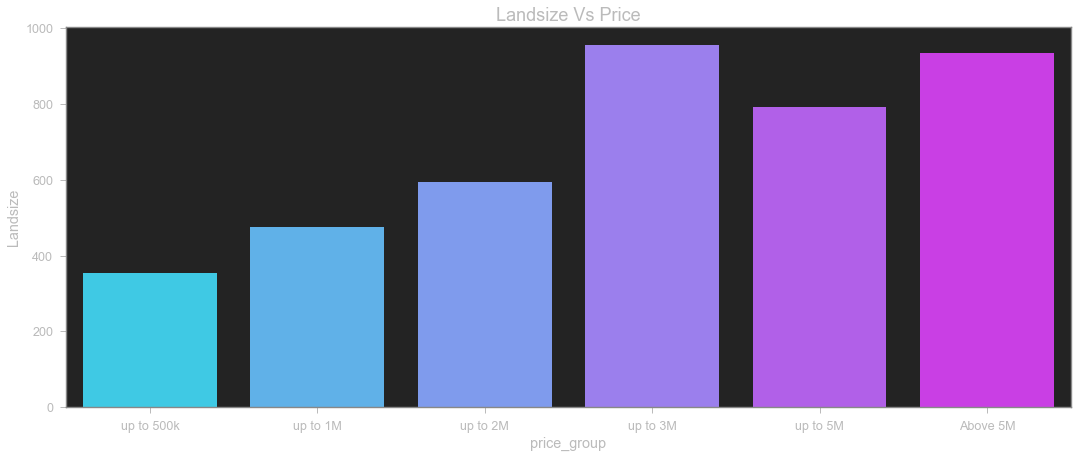

In [199]:

plt.figure(figsize=(18,7))
sns.barplot(y=df['Landsize'],x=df['price_group'], palette='cool', ci=False);
plt.title('Landsize Vs Price', fontdict= {'fontsize':18})
plt.show()

# Dapat kita lihat terlihat ada korelasi positif namun tidak cukup kuat antara kolom luas tanah dan harga dari sebuah rumah

BuildingArea vs Price

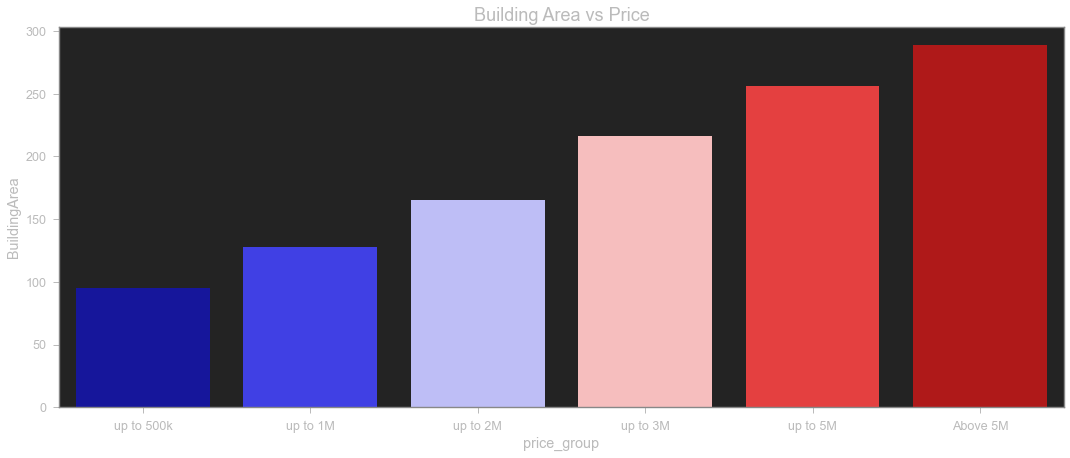

In [201]:
plt.figure(figsize=(18,7))
sns.barplot(y=df['BuildingArea'],x=df['price_group'], palette='seismic', ci=False);
plt.title('Building Area vs Price', fontdict={'fontsize': 18})
plt.show()

# Sedangkan jika dilihat dari luas bangunannya tampak bahwa semakin luas sebuah bangunan rumah berbanding lurus dengan semakin mahalnya harga rumah tersebut

Datetime vs Price

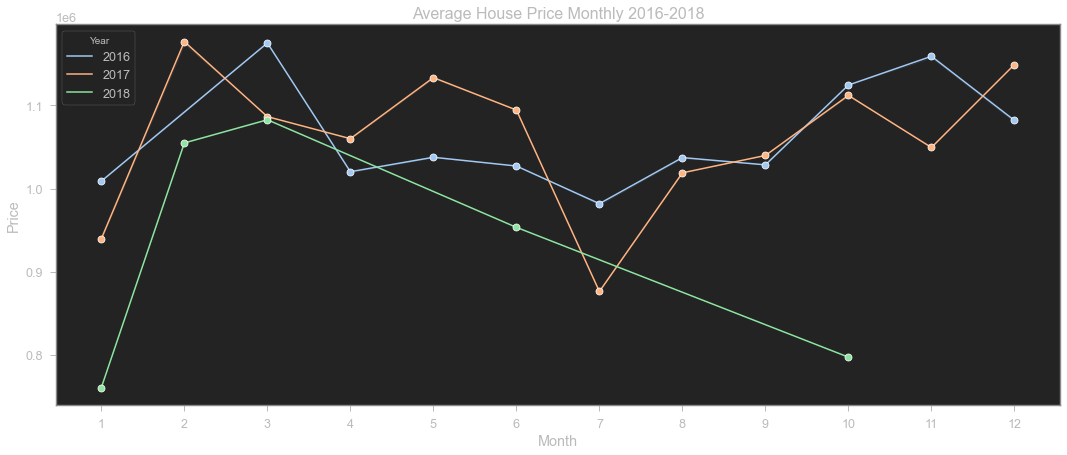

In [47]:

plt.figure(figsize=(18,7))
ax = sns.lineplot(y=df['Price'],x=df['Month'], hue=df['Year'],palette='pastel', marker='o', ci=False);
ax.set(xticks=df.Month.unique())
plt.title('Average House Price Monthly 2016-2018',fontdict={'fontsize': 16})
plt.show()

In [48]:
pd.crosstab(index=[df['Month']], columns=[df['Year'],'count'], margins=True).T

,Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Year,col_1,,,,,,,,,,,,,
2016,count,2,0,601,716,858,811,1098,1037,602,1061,792,439,8017
2017,count,346,415,1335,944,1258,1120,1535,1659,2320,1955,2067,448,15402
2018,count,23,1132,1477,0,0,620,0,0,0,403,0,0,3655
All,,371,1547,3413,1660,2116,2551,2633,2696,2922,3419,2859,887,27074


In [49]:
(pd.crosstab(index=[df['Month']], columns=[df['Year'],'Price in thou'], values=df['Price'], aggfunc='median', margins=True)/1000).T

,Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Year,col_1,,,,,,,,,,,,,
2016,Price in thou,1009.0,NaN,970.0,858.0,846.00,831.0,834.25,870.0,890.0,930.0,950.5,900.0,885.0
2017,Price in thou,780.0,1020.0,890.0,915.0,947.25,920.0,760.00,860.0,870.0,910.0,865.0,936.5,878.0
2018,Price in thou,650.0,870.0,885.0,NaN,NaN,796.0,NaN,NaN,NaN,705.0,NaN,NaN,839.0
All,,775.0,900.0,900.0,890.0,900.00,860.0,790.00,865.0,875.0,888.0,890.0,915.0,874.5


- Plot diatas menunjukkan pergerakan harga rata2 rumah di Melbourne dari tahun 2016-2018
- Dapat terlihat bahwa setiap awal tahun tepatnya di bulan January dan February penjualan property memang cenderung lesu, hanya di tahun 2018 yang tinggi penjualannya di bulan February.
- Terlihat juga demand/permintaan/penjualan properti di tahun 2017 meningkat drastis dari bulan Maret sampai dengan November, khususnya di bulan 9 atau September penjualan meningkat 285% dibanding tahun 2016 di bulan yang sama.
- Jika kita bandingkan harga median dari perbulan setiap tahunnya, pergerakannya cenderung turun tiap tahunnya. Terlihat mulai dari Semester 2 di tahun 2017 median price nya per bulannya cenderung turun dibanding tahun sebelumnya.

AgeGrop House vs Price

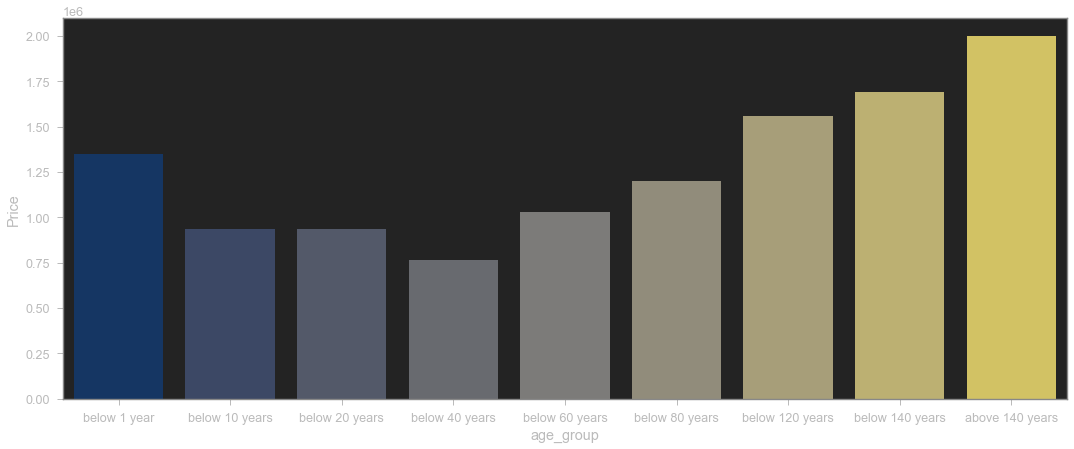

In [50]:
plt.figure(figsize=(18,7))
sns.barplot(y=df['Price'],x=df['age_group'], palette='cividis', ci=False);

In [51]:
print(f"Average distance to CBD (house > 140 years)\t: {df.loc[df['age']>=140,'Distance'].mean()}")
print(f"Average distance to CBD (house up to 140 years)\t: {df.loc[(df['age']>=120) & (df['age']<140),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 120 years)\t: {df.loc[(df['age']>=100) & (df['age']<120),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 100 years)\t: {df.loc[(df['age']>=80) & (df['age']<100),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 80 years)\t: {df.loc[(df['age']>=60) & (df['age']<80),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 60 years)\t: {df.loc[(df['age']>=40) & (df['age']<60),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 40 years)\t: {df.loc[(df['age']>=20) & (df['age']<40),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 20 years)\t: {df.loc[(df['age']>=10) & (df['age']<20),'Distance'].mean()}")
print(f"Average distance to CBD (house up to 10 years)\t: {df.loc[(df['age']>0) & (df['age']<10),'Distance'].mean()}")
print(f"Average distance to CBD (house below 0 years)\t: {df.loc[(df['age']<=0),'Distance'].mean()}")

Average distance to CBD (house > 140 years)	: 3.806250000000001
Average distance to CBD (house up to 140 years)	: 4.7037578288100175
Average distance to CBD (house up to 120 years)	: 5.702827225130884
Average distance to CBD (house up to 100 years)	: 8.15071496663486
Average distance to CBD (house up to 80 years)	: 7.7965387251542895
Average distance to CBD (house up to 60 years)	: 11.031934715606319
Average distance to CBD (house up to 40 years)	: 16.670079344765742
Average distance to CBD (house up to 20 years)	: 12.507832422586548
Average distance to CBD (house up to 10 years)	: 12.38946459412784
Average distance to CBD (house below 0 years)	: 10.23513513513513


- Berdasarkan data diatas, dapat dilihat bahwa rumah dengan usia lebih dari 140 tahun ternyata yang paling mahal dibanding yang lain, bahkan dengan rumah yang belum dibangun pun masih lebih mahal.
- Setelah ditelusuri, rumah rumah yang usianya diatas 100 tahun rata-rata jarak ke CBD dibawah 10 km, rumah dengan usia diatas 140 tahun rata2 jaraknya 3.8km ke CBD.  

Dapat disimpulkan bahwa usia rumah bukanlah penentu mahal atau tidaknya harga sebuah property.

### Categorical Feature

Type vs Price

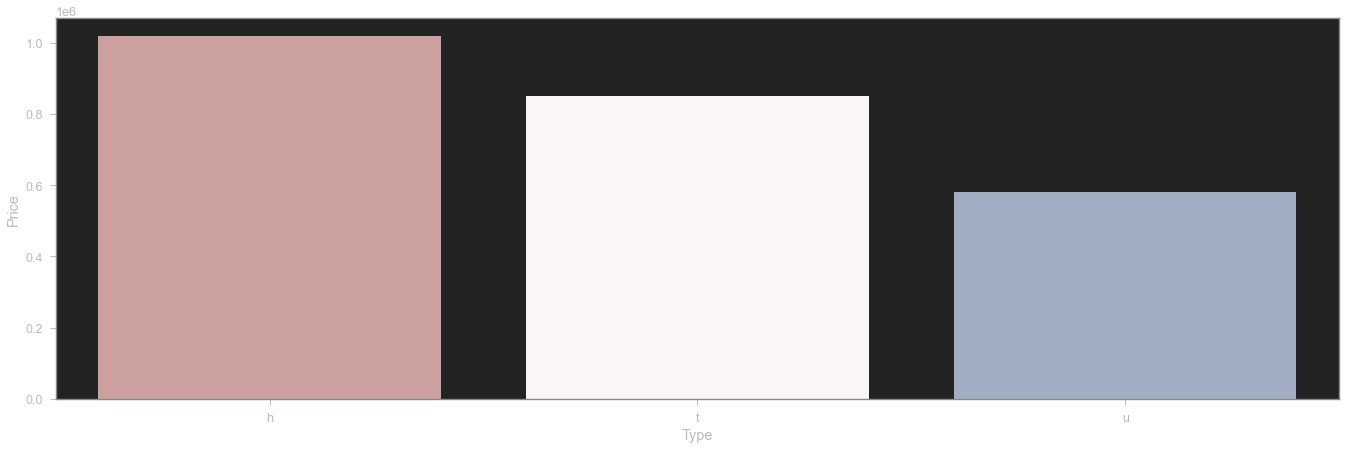

In [46]:
plt.figure(figsize=(23,7))
sns.barplot(y=df['Price'],x=df['Type'],palette='vlag_r', ci=False, estimator=median);

# Type h merupakan tipe yang nilai mediannya paling tinggi dibanding tipe yang lain.

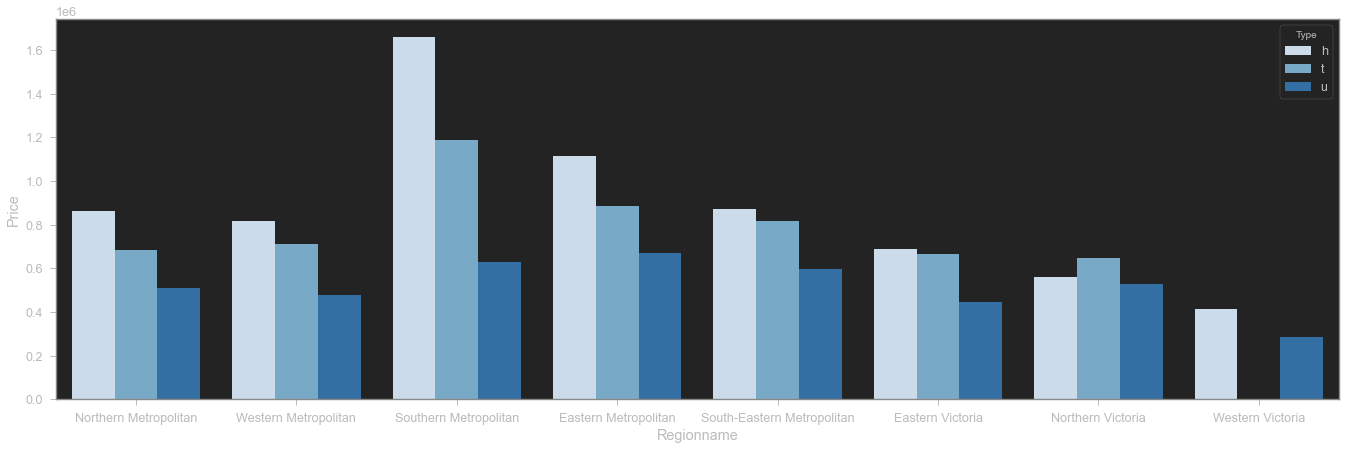

In [49]:
plt.figure(figsize=(23,7))
sns.barplot(y=df['Price'],x=df['Regionname'],hue=df['Type'],palette='Blues', ci=False, estimator=median);

# Jika melihat type property berdasarkan Regionname, secara garis besar median price dari type h memang lebih tinggi dibanding type lainnya
# Di Southern Metropolitan memang harga type h dan t paling tinggi diantara region lainnya.
# Hanya di Northern Victoria terlihat type t lebih tinggi median pricenya ketimbang type h

In [44]:
print('Median Price type h di Northern Victoria: ',df.loc[(df['Regionname']=='Northern Victoria') & (df['Type']=='h'),'Price'].median())
df.loc[(df['Regionname']=='Northern Victoria') & (df['Type']=='t')]

# Setelah ditelusuri ternyata hanya ada 1 item type t di Northern Victoria dan nilai Price nya lebih tinggi ketimbang median price dari type h.

Median Price type h di Northern Victoria:  562500.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,age,Price/sqm,price_group,age_group
20119,Diamond Creek,1/43 Phipps Cr,3,t,648000.0,S,Jellis,2017-10-28,21.8,3089.0,2.0,2.0,601.0,138.5,2008.0,Nillumbik Shire Council,-37.67847,145.15672,Northern Victoria,4258.0,10,2017,9.0,1078.202995,up to 1M,below 10 years


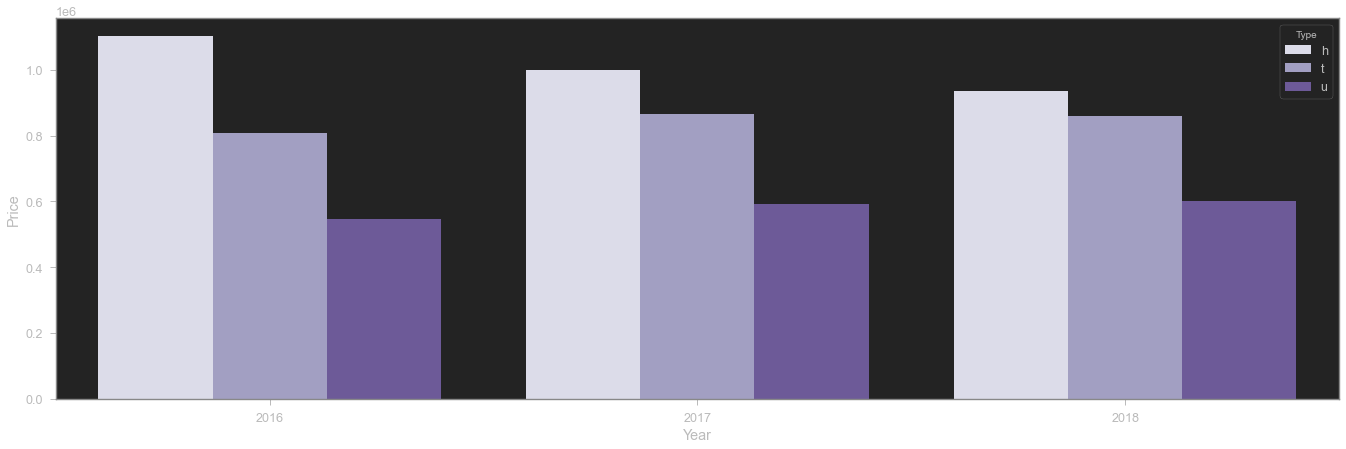

In [52]:
plt.figure(figsize=(23,7))
sns.barplot(y=df['Price'],x=df['Year'],hue=df['Type'],palette='Purples', ci=False, estimator=median);

# Menurut data barplot dibawah, untuk property type h dapat dilihat median pricenya tiap tahun menurun dan type yang lain cenderung meningkat tiap tahunnya.
# Dapat dilihat juga

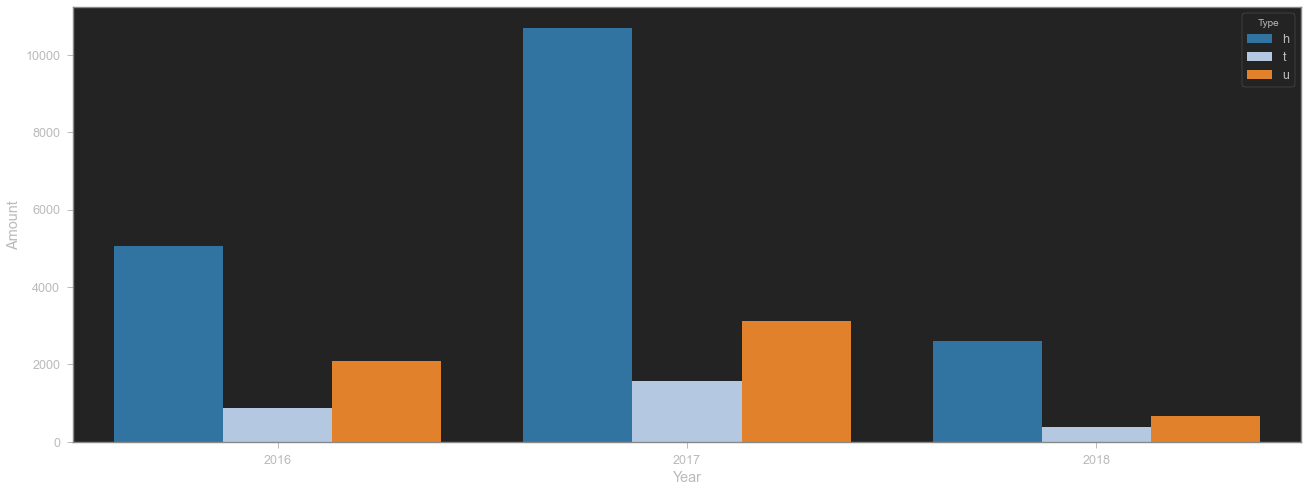

In [56]:
def barpelot(feature):
    camt = pd.crosstab(index=[df[feature],df['Type']], columns='Amount')
    camt = camt.reset_index()
    sns.barplot(x=feature,y= 'Amount',hue='Type', data=camt, palette = 'tab20')

plt.figure(figsize=(22,8))    
barpelot('Year')

# Setelah ditelaah, di 2017 penjualan type h meningkat 2x lipat dibanding tahun 2016, ini menjadi faktor mengapa nilai median di tahun 2017 menurun karena permintaan banyak sehingga rumah rumah dengan harga yang murah mudah terjual walaupun jarak dari pusat kota nya jauh

Region Name vs Price

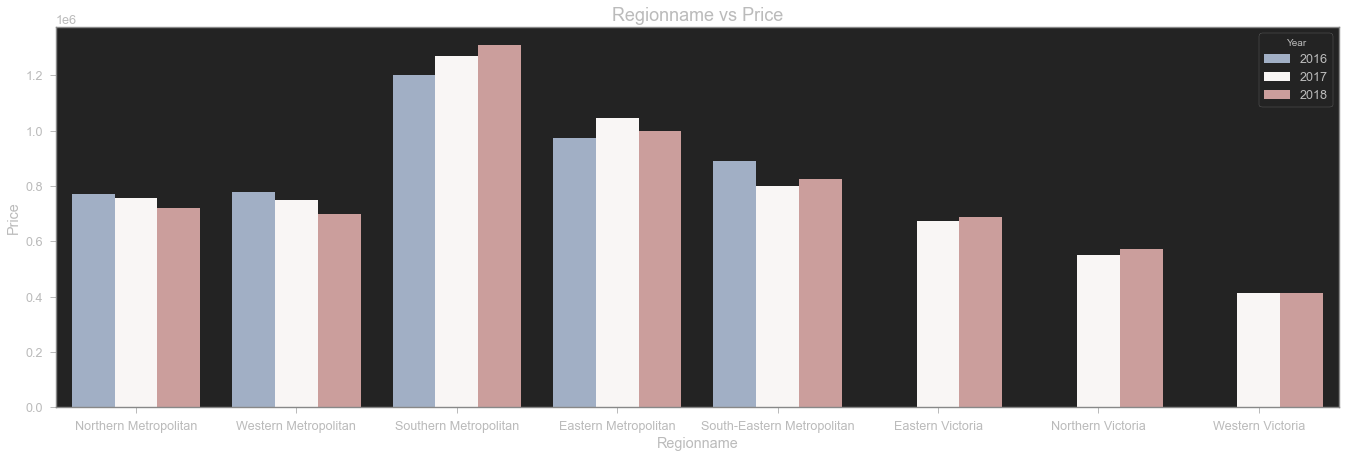

In [204]:
plt.figure(figsize=(23,7))
sns.barplot(y=df['Price'],x=df['Regionname'], hue=df['Year'],palette='vlag', ci=False, estimator=median);
plt.title('Regionname vs Price', fontdict={'fontsize':18})
plt.show()

# Southern Metropolitan is the highest median price Electoral regions in Melbourne.
# Overall the Metropolitan area has higher median price because its near the CBD compared to the Vitoria electoral region
# If we compare year by year Southern Metropolitan median price of house is increase consistently each year.
# While Northern and Western Metropolitan kind of dropped on each year.

Council Area vs Price

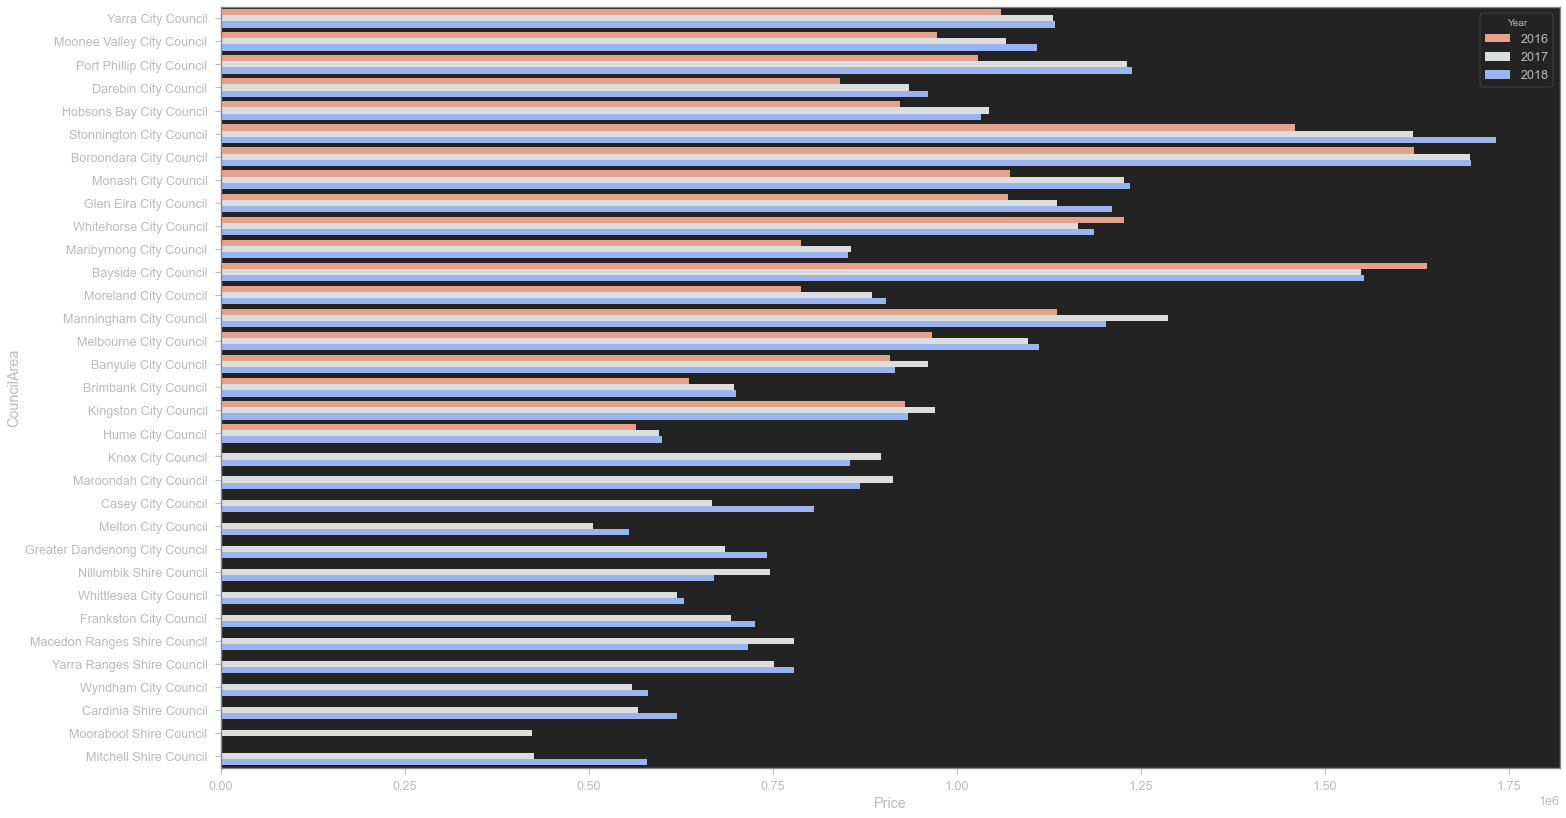

In [53]:
plt.figure(figsize=(24,14))
ax = sns.barplot(x=df['Price'],y=df['CouncilArea'], hue=df['Year'],palette='coolwarm_r', ci=False, orient="h");

# Boroondara City Council has the highest average price located in the Eastern Metro
# The second and third highest are located in Southern Metro
# Boroondara average price on 2017 and 2018 looks stable while Stonnington increase quite significant each year.

Suburb vs Price & Distance

In [54]:
suburbs = df.groupby('Suburb')['Price','Distance'].median().sort_values('Price',ascending=False)
suburbs

,Price,Distance
Suburb,,
Canterbury,2300000.0,9.0
Malvern,1985000.0,7.4
Middle Park,1880000.0,3.0
Camberwell,1840000.0,7.8
Albert Park,1810000.0,3.3
...,...,...
Bacchus Marsh,431000.0,37.5
Melton West,426000.0,31.7
Melton South,410000.0,29.8


- Hasil Crosstab Suburb dan price menampilkan Canterbury sebagai suburb yang nilai harga mediannya paling tinggi dibanding yang lain dan Kurunjang adalah suburb yang nilai harga mediannya paling rendah.
- Mengutip dari [Wikipedia](https://en.wikipedia.org/wiki/Canterbury,_Victoria) 'Famed for its leafy green boulevards and substantial, opulent historic residences, Canterbury is one of Melbourne's most expensive and exclusive suburbs'. Jelas dipaparkan bahwa memang Canterbury adalah salah satu daerah eksklusif di Melbourne, Australia.

Price/sqm vs Suburb & Distance

In [55]:
# pd.crosstab(index=[df['Suburb']], columns='Price/sqm', values=df['Price/sqm'], aggfunc='median').sort_values('Price/sqm',ascending=False)
df.groupby('Suburb')['Price/sqm','Distance'].median().sort_values('Price/sqm',ascending=False).round(2).head(30)

# Hasil crosstab menunjukkan bahwa Albert Park  dan Middle Park adalah suburbs yang mempunyai harga per/sqm yang paling tinggi.
# Jika melihat data crosstab, nampak Suburb dengan price/sqm yang tinggi jarak ke cbd kurang dari 4 km.

,Price/sqm,Distance
Suburb,,
Albert Park,10653.27,3.3
Middle Park,10613.10,3.0
South Melbourne,9023.81,1.9
Princes Hill,8758.17,3.5
Docklands,8402.37,1.9
Fitzroy,8102.56,2.1
Carlton North,8070.11,3.2
Carlton,8045.41,1.8
Port Melbourne,7692.31,3.8


In [56]:
# df.loc[df['Distance']<10,'Price'].median()

In [57]:
# Melihat Harga penawaran yang di Passed In

print(f"Harga median dengan 2 kamar dan jarak ke CBD dibawah 10 km\t\t\t: {df.loc[(df['Rooms']==2) & (df['Distance']<10),'Price'].median()}")
print(f"Harga median Property Passed In dengan 2 kamar dan jarak ke CBD dibawah 10 km   : {df.loc[(df['Method']=='PI') & (df['Rooms']==2) & (df['Distance']<10),'Price'].median()}")

Harga median dengan 2 kamar dan jarak ke CBD dibawah 10 km			: 707000.0
Harga median Property Passed In dengan 2 kamar dan jarak ke CBD dibawah 10 km   : 650000.0


Dari data diatas, terlihat bahwa nilai median rumah dengaan 2 kamar dan jarak ke cbd dibawah 10 km adalah 707,000 AUD sedangkan property yang di Passed In dengan fitur yang sama nilai mediannya 650,000 AUD. Ini menunjukkan beberapa tawaran terhadap rumah dengan spec tersebut dibawah harga pasaran dan property owner tersebut tidak menjualnya. 

In [58]:
# List Property Agents
seller = df.loc[(df['Method']!='PI') & (df['Method']!='VB')] 
top10Agency = pd.crosstab(index=[seller['SellerG']], columns=['Price','Jumlah'], colnames=['Jumlahnya', 'harganya'],values=seller['Price'], aggfunc=('median', 'count')).rename(columns={"count": "A", "median": "B"})
top10Agency.loc[top10Agency[('A','Price','Jumlah')]>100].sort_values(('B','Price','Jumlah'),ascending=False).head(10)

# Terlihat list/daftar 10 Agen properti dari Domain.au.com dengan jumlah penjualan lebih dari 100 dan median price penjualannya paling tinggi
# Property Agency Marshall merupakan Agency terbaik dengan median price 1,8 juta AUD dan sudah menjual lebih dari 800 property

,A,B
Jumlahnya,Price,Price
harganya,Jumlah,Jumlah
SellerG,,
Marshall,807,1817500.0
Kay,111,1610000.0
Jellis,1792,1220000.0
Hodges,223,1206000.0
Fletchers,445,1180000.0
RT,249,1175000.0
Buxton,1112,1175000.0


## CONCLUSION

<br>

**Data Distribution**  

Pada dataset Melbourne Housing Market ini terdapat 12 kolom numerical dan 7 kolom categorical. Berdasarkan kolom target tampak dsitribusinya skewness positif, ini menandakan, sebagian besar distribusi berada di nilai rendah dan nilai rata-rata nya diatas nilai median. Hal ini juga menunjukkan bahwa kebanyakan dari rumah yang dijual harganya dibawah rata-rata/median dan ada beberapa rumah yang terjual dengan harga yang sangat tinggi jauh melebihi harga pasaran. Hal ini tentu membuat property owner semakin sulit menentukan harga yang pas/fair untuk propertinya.

<br>

**Analisis**  

Dari dataset ini, terlihat bahwa median price property dari tahun ke tahun cenderung turun, namun terjadi lonjakan permintaan/demand terhadap property pada tahun 2017 hingga 92% dibanding tahun 2016. Demand/permintaan/penjualan properti di tahun 2017 meningkat drastis dari bulan Maret sampai dengan November, khususnya di bulan 9 atau September penjualan meningkat 285% dibanding tahun 2016 di bulan yang sama. Ini menandakan, Housing bubble mencapai puncak nya di tahun 2017 sebelum akhirnya demand melambat di bulan Desember 2017.  
Jumlah kamar dan kamar mandi yang merupakan fitur utama dari sebuah rumah memang mempengaruhi harga dari sebuah rumah. Sedangkan dari jumlah space untuk parker mobil tidak terlalu berpengaruh banyak terhadap harga dari suatu rumah. Luas bangunan juga menjadi salah satu faktor yang mempengaruhi harga dari suatu rumah, umur dari sebuah rumah bukanlah faktor yang berpengaruh pada suatu harga rumah,karena sebuah rumah dapat direnovasi pada akhirnya.  
Berdasarkan hasil folium map, terlihat bahwa rumah rumah yang harganya dibawah harga median atau dengan kisaran harga 500k - 1M letaknya berada jauh dari CBD, sedangkan rumah dengan kisaran harga 4 - 10M atau bisa di bilang sangat mahal berada disekitaran/dekat dengan CBD area.  
Dari peta pebaran tersebut bahwa beberapa daerah/suburb walaupun jaraknya tidak terlalu dekat namun median price nya sangat tinggi seperti Canterbury yang median price nya sangat tinggi padahal distancenya dari CBD 9.0 km.  
Hal ini tentu mengindikasikan bahwa jarak rumah dari CBD area adalah salah satu faktor penting dalam menentukan rumah dan daerah/suburbs dari sebuah rumah juga menentukan harga sebuah rumah.
Dari dataset, property type house dan townhouse dengan 2 bedroom dan jarak kurang dari 10 km ke CBD yang paling affordable di Melbourne terletak di region Western dan Northern Metropolitan.
Untuk daerah yang menjual rumah 2 kamar dan jarak ke CBD dibawah 10km dengan median price terendah terletak di Suburbs Maribyrnong Western Metropolitan.  
East Melbourne dari region Northern Metropolitan merupakan daerah yang menjual rumah dengan 2 kamar dan jarak dari CBD area kurang dari 10 km dengan median price tertinggi.
<br>

## SUGGESTION

- Cek lokasi property anda terlebih dahulu, apakah lokasi anda tersebut termasuk dalam daerah suburb yang median price rumahnya memang tinggi atau tidak. Karena ini faktor penting untuk menentukan nilai harga property agar anda tidak menentukan harganya kerendahan.

- Umur sebuah property bukanlah hal yang siginifikan untuk menentukan harga property anda.

- Jarak Property Anda dengan CBD merupakah hal yang sangat mempengaruhi sebuah harga, jika jarak property anda ke CBD area berada dibawah 10 KM maka median Price nya adalah AUD 975,000.

- Untuk menaikkan peluang anda dalam menjual property dengan harga yang tinggi, disarankan agar menggunakan jasa Property Agent Marshall, Jellis atau Buxton karena portfolio mereka yang berhasil menjual property diatas 800 buah dengan nilai median price diatas 1 juta AUD.


In [59]:
# Dashboard = df.groupby('Suburb')['Distance'].median()

In [159]:
# df_num = df.select_dtypes(exclude=['object','datetime64']).columns
# df_num = df_num.drop('Price')

In [158]:
# x = 1 
# plt.figure(figsize=(30,19))
# for column in df_num:
#     plt.subplot(4,5,x)
#     sns.boxplot(df[column])
#     x+=1

In [14]:
df.loc[df['Landsize']>400000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13939,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,2017-12-08,2.1,3065.0,3.0,1.0,433014.0,245.0,1950.0,Yarra City Council,-37.79751,144.98309,Northern Metropolitan,5825.0
